In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
!pip install --upgrade gspread

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [ ]:


from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()
creds,_=default()
gc = gspread.authorize(creds)

worksheet = gc.open('deep learning').sheet1

data = worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'int'})
dataset1 = dataset1.astype({'Output':'int'})

dataset1.head()

,input,Output
0,1,5
1,2,10
2,3,15
3,4,20
4,5,25


In [ ]:
dataset1.head()

X = dataset1[['input']].values
y = dataset1[['Output']].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
MinMaxScaler()
X_train1 = Scaler.transform(X_train)
ai_brain=Sequential([Dense(units=3,input_shape=[1]),Dense(units=3),Dense(units=1)])
ai_brain.compile(optimizer="rmsprop",loss="mae")
ai_brain.fit(X_train1,y_train,epochs=1000)
loss_df = pd.DataFrame(ai_brain.history.history)

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 44.0992
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 44.0794
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 44.0650
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 44.0530
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 44.0423
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 44.0325
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 44.0234
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 44.0147
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 44.0064
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 43.9983
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.9906
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.9830
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 43.9756
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 43.9683
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 43.9611
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 17.9280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[55.842094]], dtype=float32)

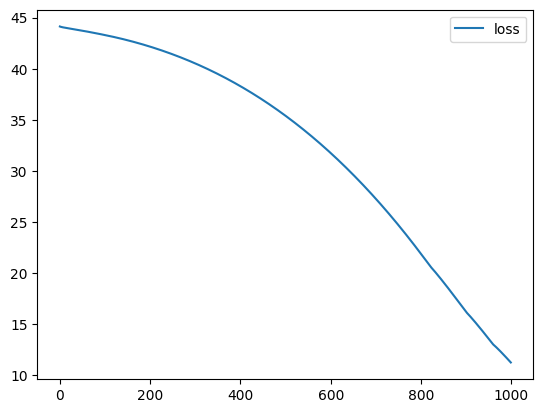

In [ ]:
loss_df.plot()
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)
X_n1 = [[18]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.9280


17.927968978881836

In [ ]:
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[55.842094]], dtype=float32)